In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data-1.csv')

#Glimpse of Data
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [4]:
df.shape

(25000, 24)

In [159]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ware_house_ID,25000,25000,WH_102943,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_Manager_ID,25000,25000,EID_59722,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_type,25000,2,Rural,22957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_capacity_size,25000,3,Large,10169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,25000,4,North,10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_regional_zone,25000,6,Zone 6,8339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_refill_req_l3m,25000.0,NaN,NaN,NaN,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,NaN,NaN,NaN,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,NaN,NaN,NaN,3.1042,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,NaN,NaN,NaN,4985.71156,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0


In [11]:
df['product_wg_ton'].unique()

array([17115,  5074, 23137, ..., 33073, 40070, 11071], dtype=int64)

In [6]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [7]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 2.3 %


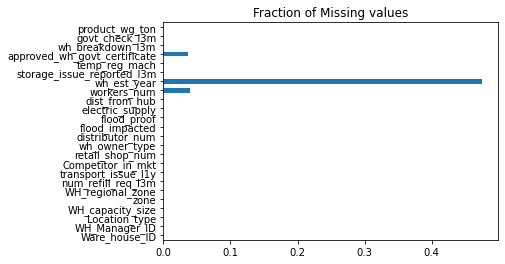

In [128]:
((df.isnull().sum())/df.shape[0]).plot(kind='barh')
plt.title('Fraction of Missing values')
plt.show()

In [8]:
print('Number of Duplicates =', df.duplicated().sum().sum())

Number of Duplicates = 0


In [166]:
round(pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness']),2)

,Skewness
flood_proof,3.92
flood_impacted,2.70
transport_issue_l1y,1.61
workers_num,1.06
Competitor_in_mkt,0.98
retail_shop_num,0.91
temp_reg_mach,0.86
product_wg_ton,0.33
storage_issue_reported_l3m,0.11
distributor_num,0.02


In [4]:
dfn=df.copy()

In [5]:
dfn.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)
dfn.shape

(25000, 22)

### Univariate Analysis

Continous Variables

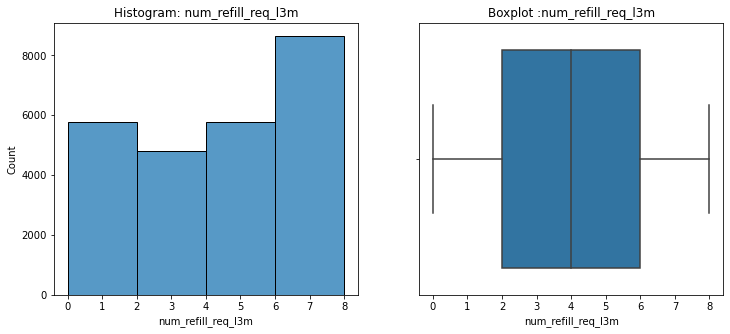

In [60]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['num_refill_req_l3m'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='num_refill_req_l3m', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: num_refill_req_l3m')
axs[1].set_title('Boxplot :num_refill_req_l3m')
plt.show()

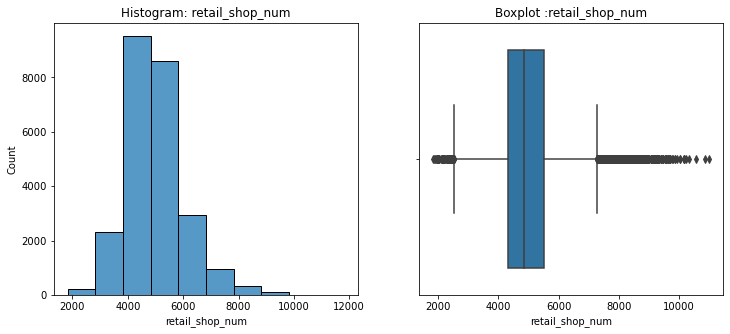

In [65]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['retail_shop_num'],binwidth=1000,kde=False, ax=axs[0])
sns.boxplot(x='retail_shop_num', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: retail_shop_num')
axs[1].set_title('Boxplot :retail_shop_num')
plt.show()

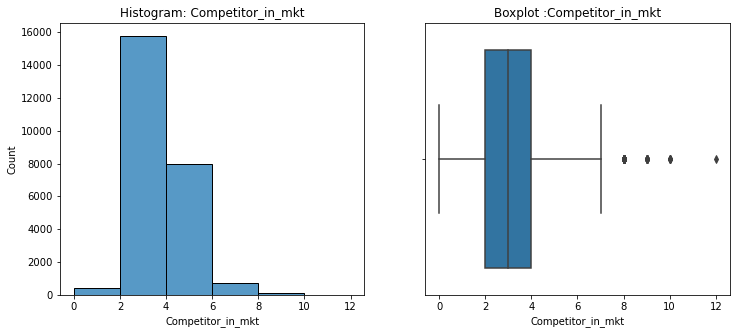

In [66]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['Competitor_in_mkt'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='Competitor_in_mkt', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: Competitor_in_mkt')
axs[1].set_title('Boxplot :Competitor_in_mkt')
plt.show()

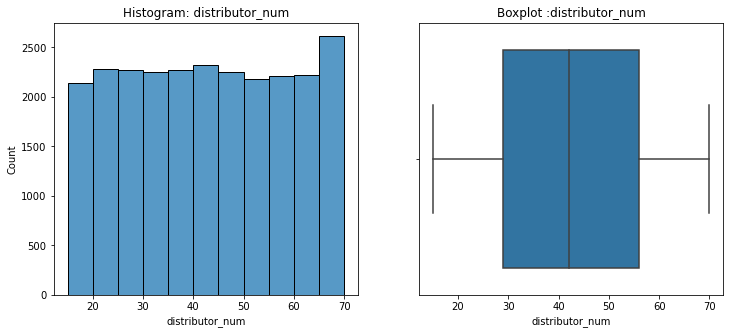

In [67]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['distributor_num'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='distributor_num', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: distributor_num')
axs[1].set_title('Boxplot :distributor_num')
plt.show()

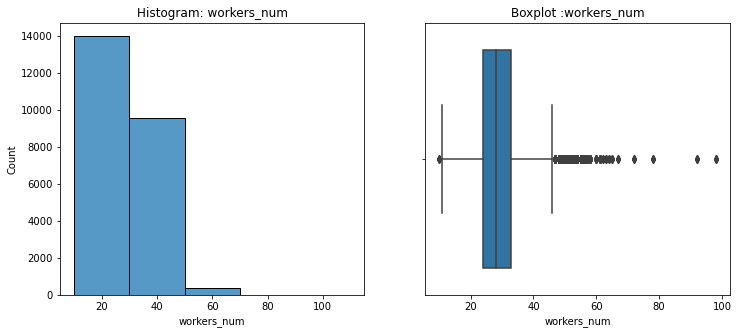

In [68]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['workers_num'],binwidth=20,kde=False, ax=axs[0])
sns.boxplot(x='workers_num', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: workers_num')
axs[1].set_title('Boxplot :workers_num')
plt.show()

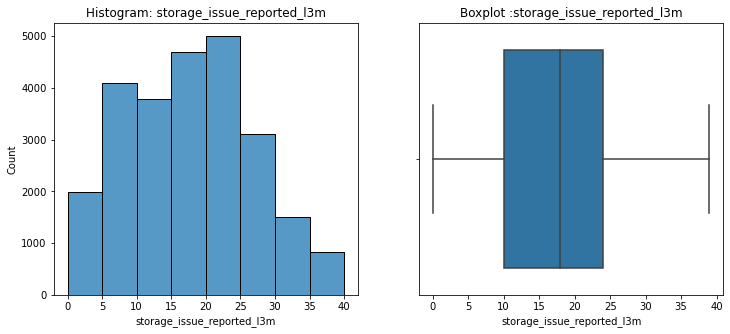

In [69]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['storage_issue_reported_l3m'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='storage_issue_reported_l3m', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: storage_issue_reported_l3m')
axs[1].set_title('Boxplot :storage_issue_reported_l3m')
plt.show()

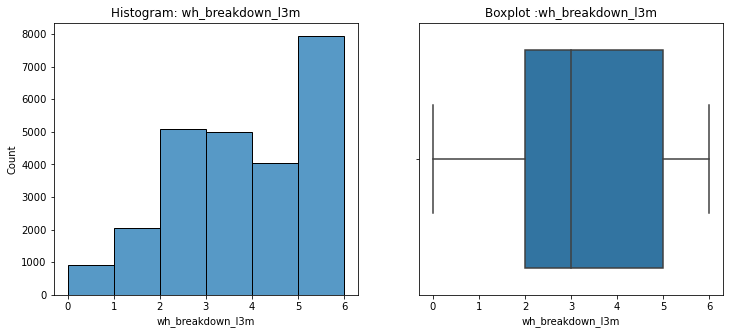

In [70]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['wh_breakdown_l3m'],binwidth=1,kde=False, ax=axs[0])
sns.boxplot(x='wh_breakdown_l3m', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: wh_breakdown_l3m')
axs[1].set_title('Boxplot :wh_breakdown_l3m')
plt.show()

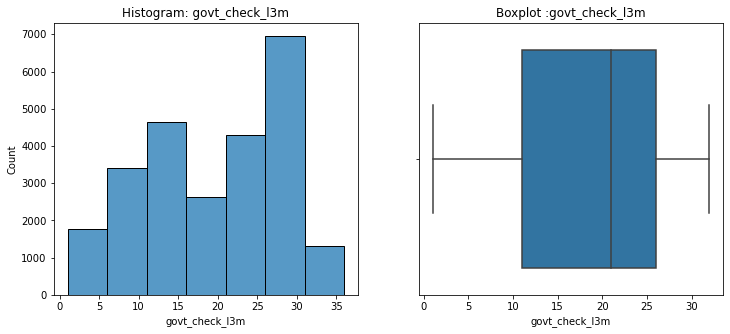

In [71]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['govt_check_l3m'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='govt_check_l3m', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: govt_check_l3m')
axs[1].set_title('Boxplot :govt_check_l3m')
plt.show()

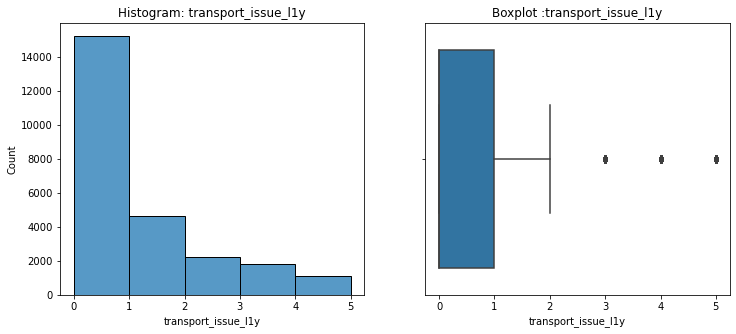

In [72]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['transport_issue_l1y'],binwidth=1,kde=False, ax=axs[0])
sns.boxplot(x='transport_issue_l1y', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: transport_issue_l1y')
axs[1].set_title('Boxplot :transport_issue_l1y')
plt.show()

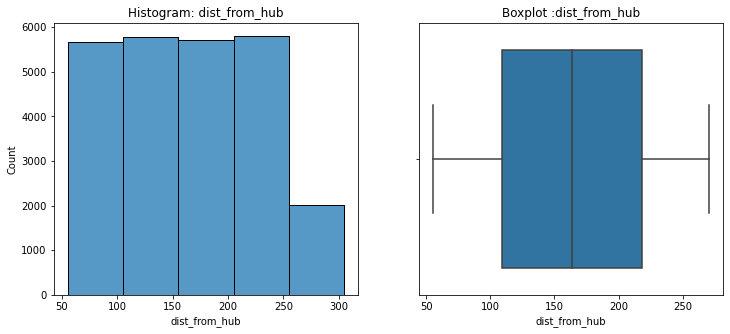

In [73]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['dist_from_hub'],binwidth=50,kde=False, ax=axs[0])
sns.boxplot(x='dist_from_hub', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: dist_from_hub')
axs[1].set_title('Boxplot :dist_from_hub')
plt.show()

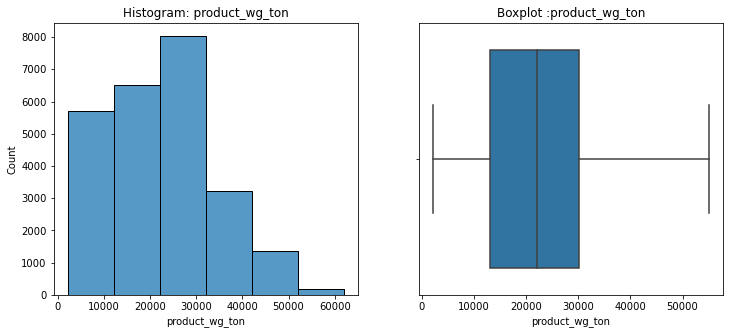

In [83]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sns.histplot(dfn['product_wg_ton'],binwidth=10000,kde=False, ax=axs[0])
sns.boxplot(x='product_wg_ton', data=dfn, ax=axs[1])
axs[0].set_title('Histogram: product_wg_ton')
axs[1].set_title('Boxplot :product_wg_ton')
plt.show()

Categorical Variables

In [194]:
dfn_cat_stats = pd.Series( ['Location_type', 'WH_capacity_size', 'WH_regional_zone', 'flood_impacted', 
                                       'flood_proof', 'electric_supply','temp_reg_mach','approved_wh_govt_certificate','wh_owner_type'])

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

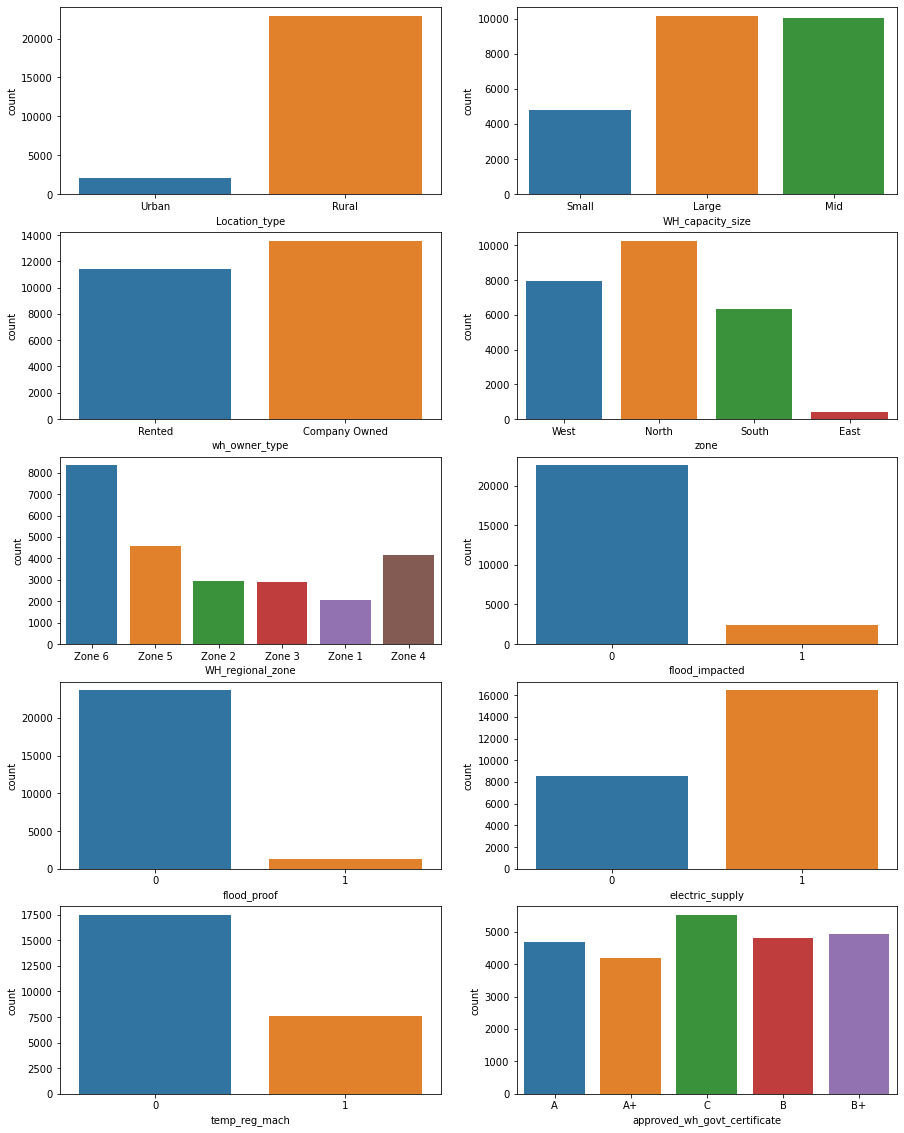

In [209]:
fig = plt.figure(figsize = (15,20))

ax1 = fig.add_subplot(5,2,1)
sns.countplot(data = dfn, x = 'Location_type', ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.countplot(data = dfn, x = 'WH_capacity_size', ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.countplot(data = dfn, x = 'wh_owner_type', ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.countplot(data = dfn, x = 'zone', ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.countplot(data = dfn, x = 'WH_regional_zone', ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.countplot(data = dfn, x = 'flood_impacted', ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.countplot(data = dfn, x = 'flood_proof', ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.countplot(data = dfn, x = 'electric_supply', ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.countplot(data = dfn, x = 'temp_reg_mach', ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.countplot(data = dfn, x = 'approved_wh_govt_certificate', ax=ax10)

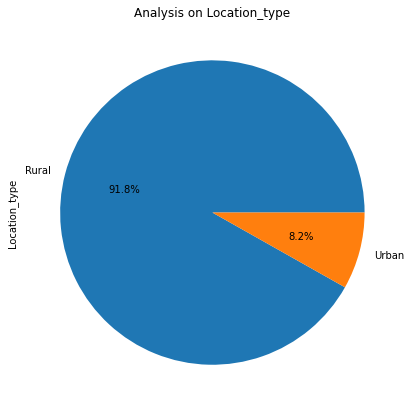

In [110]:
dfn['Location_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on Location_type')
plt.show()

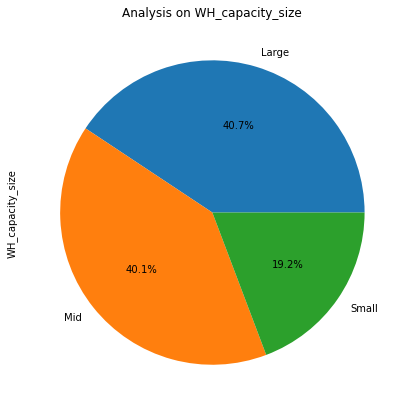

In [111]:
dfn['WH_capacity_size'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on WH_capacity_size')
plt.show()

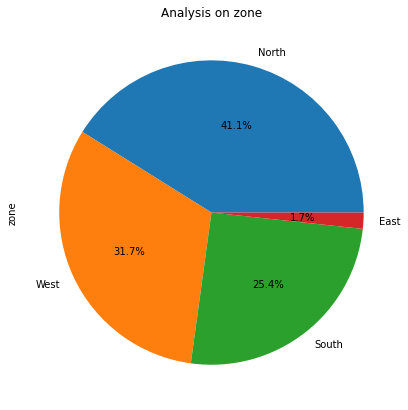

In [112]:
dfn['zone'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on zone')
plt.show()

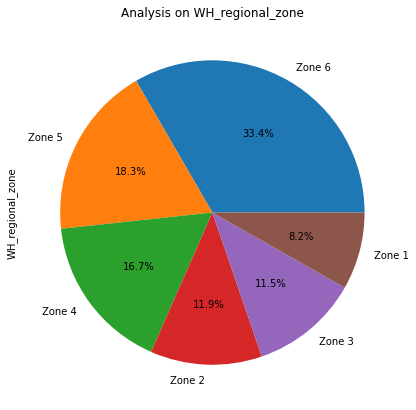

In [113]:
dfn['WH_regional_zone'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on WH_regional_zone')
plt.show()

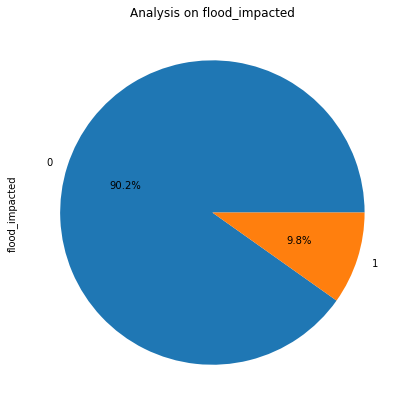

In [114]:
dfn['flood_impacted'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on flood_impacted')
plt.show()

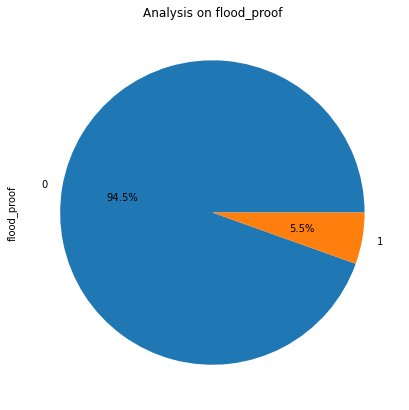

In [115]:
dfn['flood_proof'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on flood_proof')
plt.show()

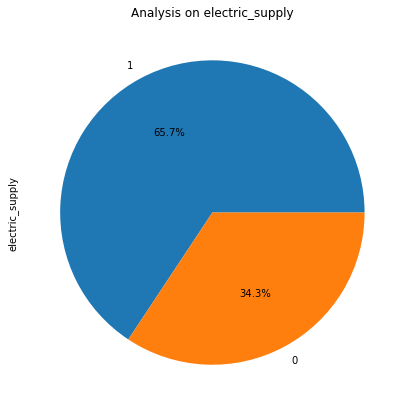

In [116]:
dfn['electric_supply'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on electric_supply')
plt.show()

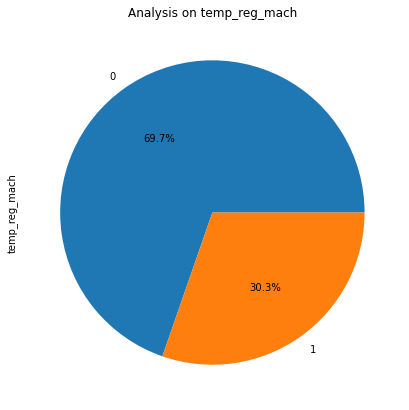

In [117]:
dfn['temp_reg_mach'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on temp_reg_mach')
plt.show()

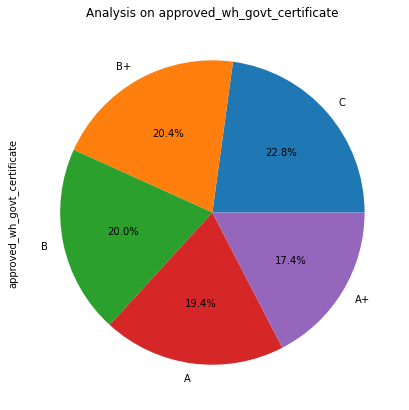

In [118]:
dfn['approved_wh_govt_certificate'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on approved_wh_govt_certificate')
plt.show()

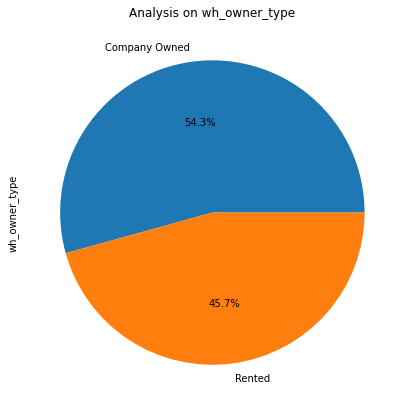

In [119]:
dfn['wh_owner_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on wh_owner_type')
plt.show()


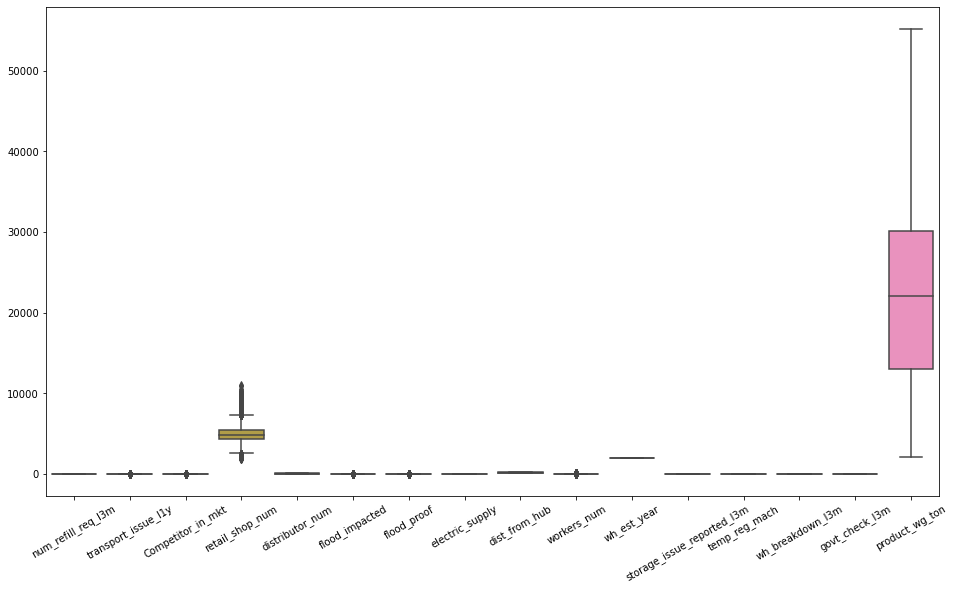

In [189]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=dfn);
plt.xticks(rotation=30);
plt.savefig('box.jpg', bbox_inches='tight');

### Bivariate Analysis

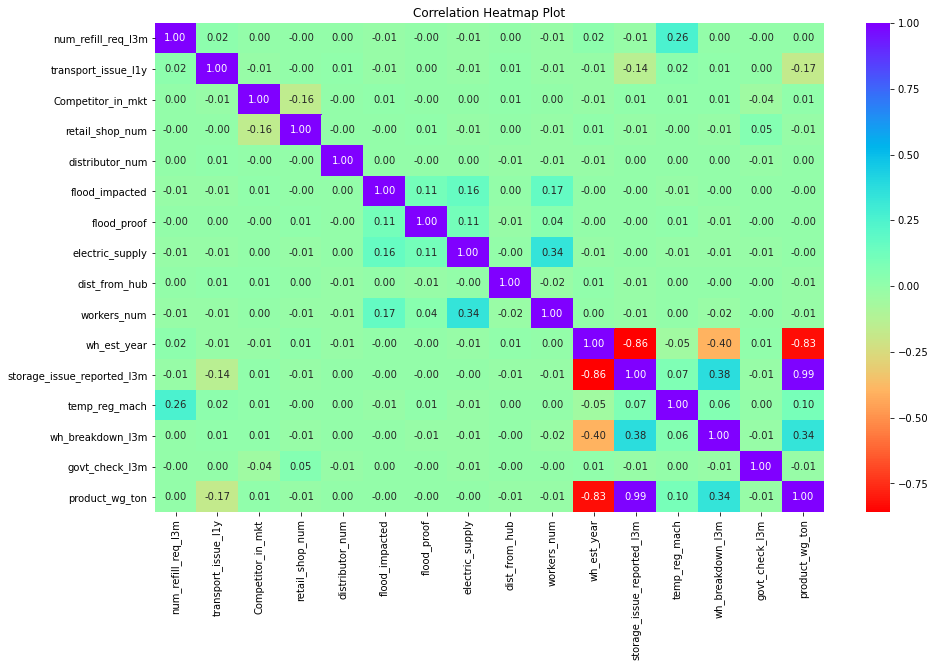

In [40]:
plt.figure(figsize=(15,9))
sns.heatmap(round(dfn.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

In [123]:
corr = dfn.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

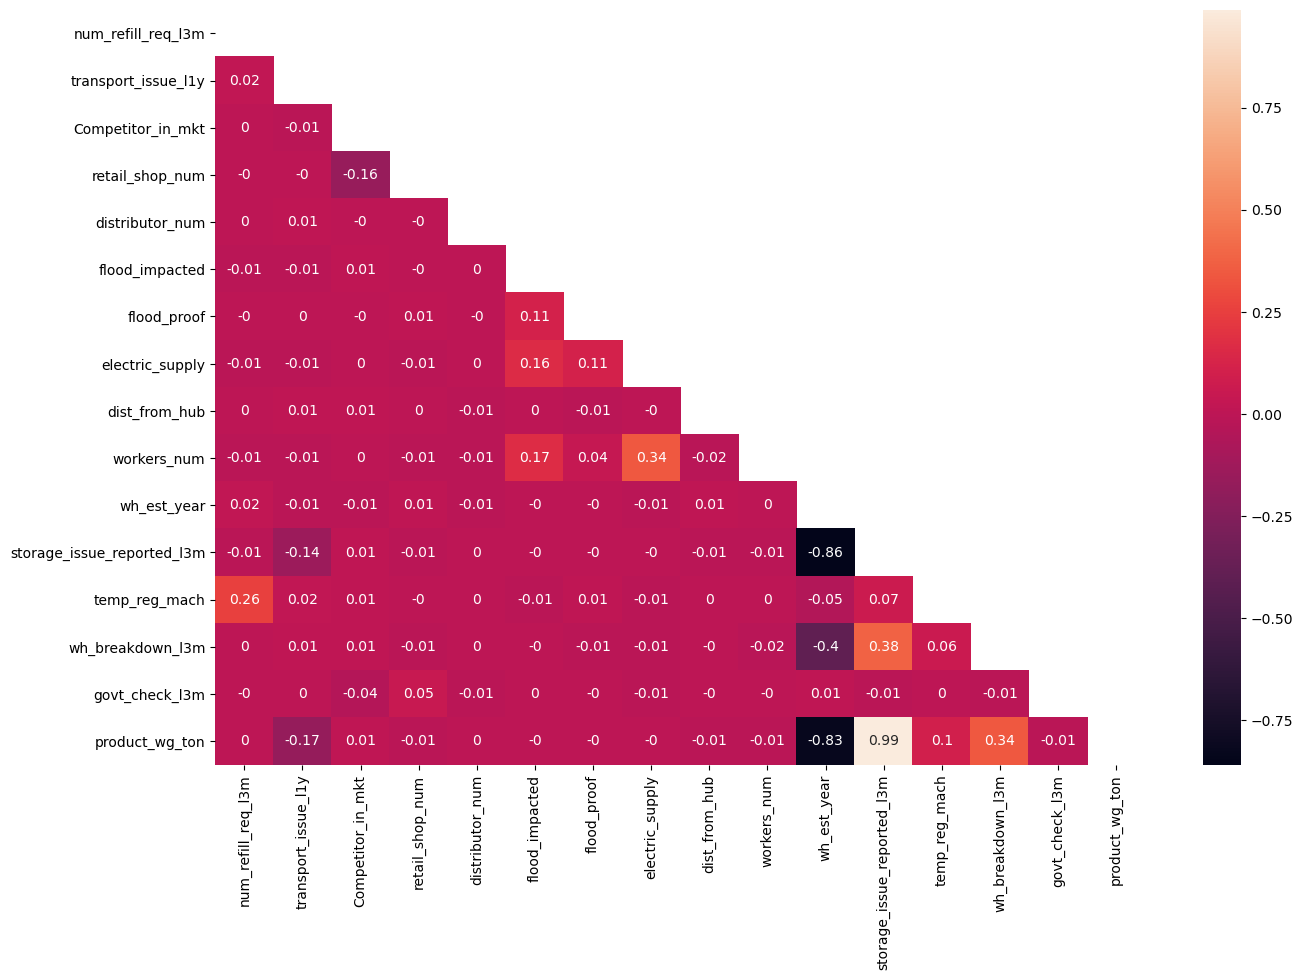

In [125]:
plt.figure(figsize=(15,10),dpi=100)
sns.heatmap(round(corr,2),mask=mask,annot=True)
plt.show()

In [7]:
num=['num_refill_req_l3m', 'retail_shop_num','Competitor_in_mkt',
     'distributor_num','workers_num','wh_est_year','storage_issue_reported_l3m',
     'wh_breakdown_l3m','govt_check_l3m', 'transport_issue_l1y',
     'dist_from_hub','product_wg_ton']

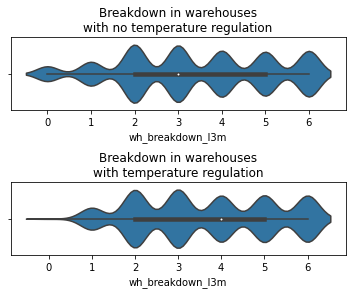

In [8]:
plt.subplot(2,1,1)
sns.violinplot(dfn[num[7]][dfn.temp_reg_mach==0])
plt.title('Breakdown in warehouses\nwith no temperature regulation')
plt.subplot(2,1,2)
sns.violinplot(dfn[num[7]][dfn.temp_reg_mach==1])
plt.subplots_adjust(hspace=1)
plt.title('Breakdown in warehouses\nwith temperature regulation')
plt.show()

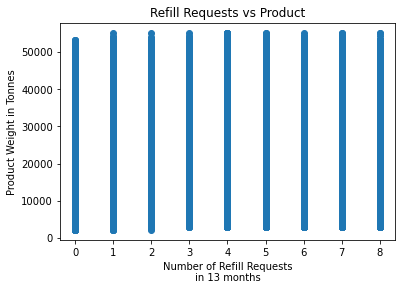

In [9]:
plt.scatter(dfn.num_refill_req_l3m,dfn.product_wg_ton)
plt.title('Refill Requests vs Product')
plt.xlabel('Number of Refill Requests\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

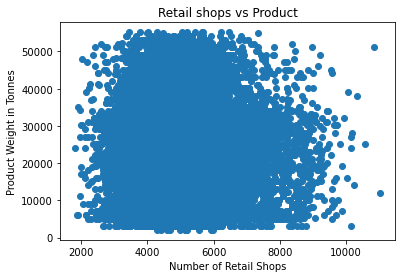

In [10]:
plt.scatter(dfn.retail_shop_num,dfn.product_wg_ton)
plt.title('Retail shops vs Product')
plt.xlabel('Number of Retail Shops')
plt.ylabel('Product Weight in Tonnes')
plt.show()

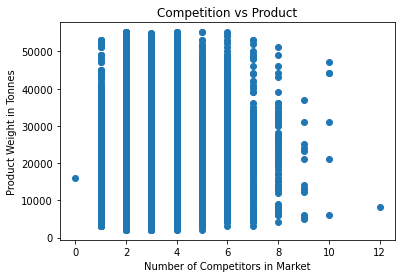

In [11]:
plt.scatter(dfn.Competitor_in_mkt,dfn.product_wg_ton)
plt.title('Competition vs Product')
plt.xlabel('Number of Competitors in Market')
plt.ylabel('Product Weight in Tonnes')
plt.show()

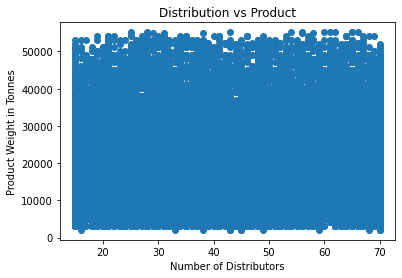

In [12]:
plt.scatter(dfn.distributor_num,dfn.product_wg_ton)
plt.title('Distribution vs Product')
plt.xlabel('Number of Distributors')
plt.ylabel('Product Weight in Tonnes')
plt.show()

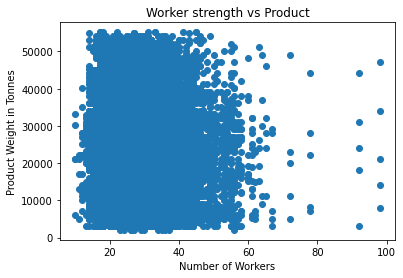

In [13]:
plt.scatter(dfn.workers_num,dfn.product_wg_ton)
plt.title('Worker strength vs Product')
plt.xlabel('Number of Workers')
plt.ylabel('Product Weight in Tonnes')
plt.show()

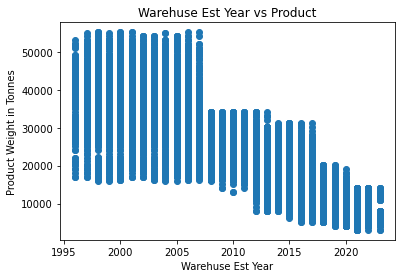

In [14]:
plt.scatter(dfn.wh_est_year,dfn.product_wg_ton)
plt.title('Warehuse Est Year vs Product')
plt.xlabel('Warehuse Est Year')
plt.ylabel('Product Weight in Tonnes')
plt.show()

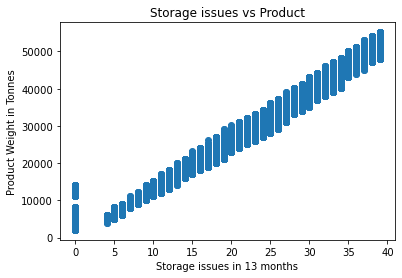

In [15]:
plt.scatter(dfn.storage_issue_reported_l3m,dfn.product_wg_ton)
plt.title('Storage issues vs Product')
plt.xlabel('Storage issues in 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

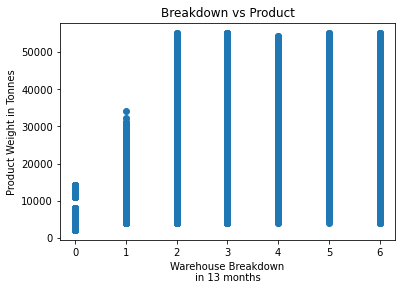

In [16]:
plt.scatter(dfn.wh_breakdown_l3m,dfn.product_wg_ton)
plt.title('Breakdown vs Product')
plt.xlabel('Warehouse Breakdown\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

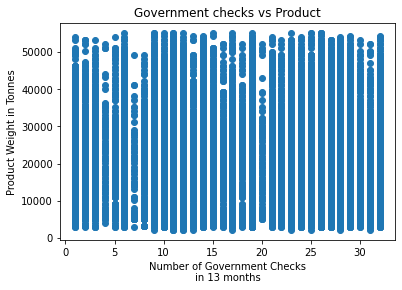

In [17]:
plt.scatter(dfn.govt_check_l3m,dfn.product_wg_ton)
plt.title('Government checks vs Product')
plt.xlabel('Number of Government Checks\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

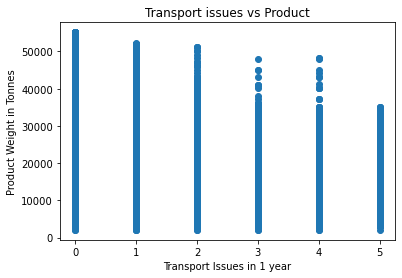

In [18]:
plt.scatter(dfn.transport_issue_l1y,dfn.product_wg_ton)
plt.title('Transport issues vs Product')
plt.xlabel('Transport Issues in 1 year')
plt.ylabel('Product Weight in Tonnes')
plt.show()

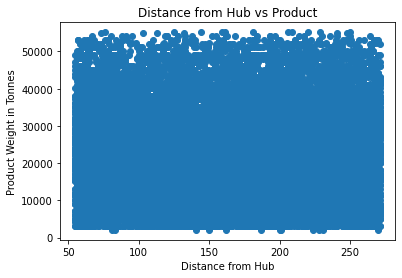

In [19]:
plt.scatter(dfn.dist_from_hub,dfn.product_wg_ton)
plt.title('Distance from Hub vs Product')
plt.xlabel('Distance from Hub')
plt.ylabel('Product Weight in Tonnes')
plt.show()

In [20]:
dfn[['WH_capacity_size','product_wg_ton','num_refill_req_l3m','wh_breakdown_l3m']].groupby('WH_capacity_size').mean().reset_index()

,WH_capacity_size,product_wg_ton,num_refill_req_l3m,wh_breakdown_l3m
0,Large,22100.487855,4.093815,3.475268
1,Mid,22202.298104,4.113473,3.496906
2,Small,21899.591561,4.028061,3.465392


In [21]:
dfn[
  ['approved_wh_govt_certificate','product_wg_ton','workers_num']
  ].groupby('approved_wh_govt_certificate').mean().sort_values(by='product_wg_ton',ascending=False).reset_index()

,approved_wh_govt_certificate,product_wg_ton,workers_num
0,A+,26717.947984,28.879692
1,A,24122.532220,28.813673
2,B+,21456.008338,28.985403
3,B,21259.281588,28.967330
4,C,20938.889293,29.035566


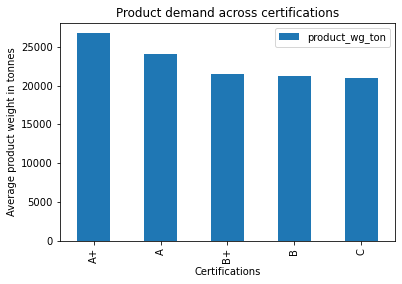

In [22]:
dfn[
  ['approved_wh_govt_certificate','product_wg_ton']
  ].groupby('approved_wh_govt_certificate').mean().sort_values(by='product_wg_ton',ascending=False).plot(kind='bar')
plt.title('Product demand across certifications')
plt.xlabel('Certifications')
plt.ylabel('Average product weight in tonnes')
plt.show()

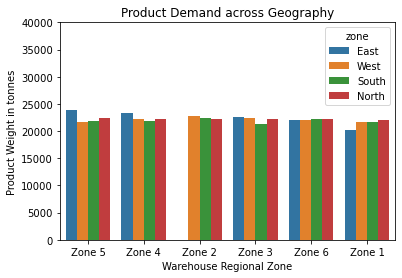

In [28]:
R1=dfn[['zone','WH_regional_zone','product_wg_ton']].groupby(
         ['zone','WH_regional_zone']
         ).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()
sns.barplot(x='WH_regional_zone', y='product_wg_ton', hue='zone', data=R1) 
plt.ylim(0,40000)
plt.title('Product Demand across Geography')
plt.xlabel('Warehouse Regional Zone')
plt.ylabel('Product Weight in tonnes')
plt.show()

In [25]:
dfn[['zone','product_wg_ton']].groupby(['zone']).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()

,zone,product_wg_ton
0,East,22721.452214
1,North,22199.437926
2,West,22079.384189
3,South,21933.495913


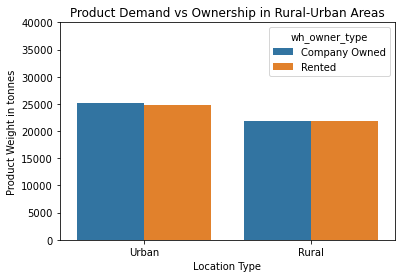

,Location_type,wh_owner_type,product_wg_ton,distributor_num
0,Urban,Company Owned,25189.973588,41.882514
1,Urban,Rented,24787.989418,42.741799
2,Rural,Rented,21940.542044,42.498616
3,Rural,Company Owned,21763.743830,42.373157


In [26]:
R2=dfn[['Location_type','wh_owner_type','product_wg_ton','distributor_num'] ].groupby(
    ['Location_type', 'wh_owner_type']).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()
sns.barplot(x='Location_type', y='product_wg_ton', hue='wh_owner_type', data=R2)
plt.ylim(0,40000)
plt.title('Product Demand vs Ownership in Rural-Urban Areas')
plt.xlabel('Location Type')
plt.ylabel('Product Weight in tonnes')
plt.show()
R2

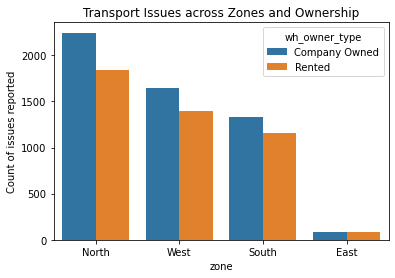

In [120]:
U1=dfn[dfn['transport_issue_l1y']>0][['wh_owner_type','zone']].value_counts().reset_index()
sns.barplot(data=U1,x='zone',y=0,hue='wh_owner_type')
plt.title('Transport Issues across Zones and Ownership')
plt.ylabel('Count of issues reported')
plt.show()

In [29]:
dfn[['zone','WH_capacity_size']].value_counts()

zone   WH_capacity_size
North  Large               5490
West   Mid                 3554
South  Mid                 3211
North  Mid                 3001
West   Large               2990
North  Small               1787
South  Large               1615
       Small               1536
West   Small               1387
East   Mid                  254
       Small                101
       Large                 74
dtype: int64

In [167]:
round(dfn[['zone','retail_shop_num','distributor_num','Competitor_in_mkt','govt_check_l3m']].groupby('zone').mean(),2)

,retail_shop_num,distributor_num,Competitor_in_mkt,govt_check_l3m
zone,,,,
East,4804.84,41.39,5.22,22.79
North,5046.63,42.40,2.98,19.93
South,5019.30,42.30,2.51,20.27
West,4889.61,42.59,3.62,15.98


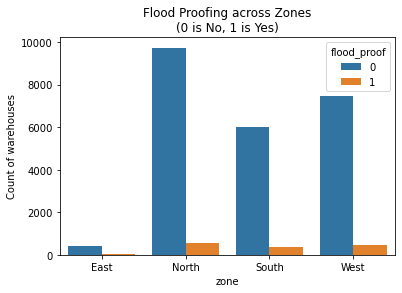

,zone,flood_proof,Warehouse_Count
0,East,0,404
1,East,1,25
2,North,0,9737
3,North,1,541
4,South,0,6009
5,South,1,353
6,West,0,7484
7,West,1,447


In [34]:
R3=df[
  ['Ware_house_ID','zone','flood_proof']
  ].groupby(
      ['zone','flood_proof']
      ).nunique().reset_index().rename(columns={'Ware_house_ID':'Warehouse_Count'})
sns.barplot(data=R3,x='zone',hue='flood_proof',y='Warehouse_Count')
plt.ylabel('Count of warehouses')
plt.title('Flood Proofing across Zones\n(0 is No, 1 is Yes)')
plt.show()
R3

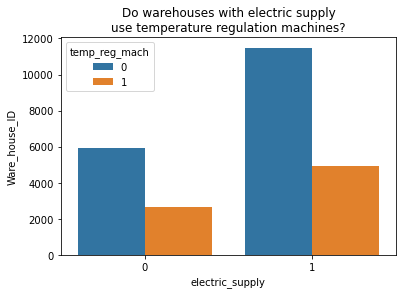

In [122]:
T1=df[
     ['Ware_house_ID','electric_supply','temp_reg_mach']
     ].groupby(
         ['electric_supply','temp_reg_mach']
         ).count().reset_index()
sns.barplot(x='electric_supply', y='Ware_house_ID', hue='temp_reg_mach', data=T1)
plt.title('Do warehouses with electric supply\nuse temperature regulation machines?')
plt.show()

### Missing value Treatment

In [6]:
dfn.isnull().sum().sort_values(ascending = False)/dfn.index.size

wh_est_year                     0.47524
workers_num                     0.03960
approved_wh_govt_certificate    0.03632
Location_type                   0.00000
WH_capacity_size                0.00000
govt_check_l3m                  0.00000
wh_breakdown_l3m                0.00000
temp_reg_mach                   0.00000
storage_issue_reported_l3m      0.00000
dist_from_hub                   0.00000
electric_supply                 0.00000
flood_proof                     0.00000
flood_impacted                  0.00000
distributor_num                 0.00000
wh_owner_type                   0.00000
retail_shop_num                 0.00000
Competitor_in_mkt               0.00000
transport_issue_l1y             0.00000
num_refill_req_l3m              0.00000
WH_regional_zone                0.00000
zone                            0.00000
product_wg_ton                  0.00000
dtype: float64

Imputing the missing values

In [6]:
dfn_try=dfn.copy()

In [7]:
df2=pd.get_dummies(data=dfn,columns=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'],drop_first=True)

In [8]:
df2.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
sub=df2.columns

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)
df_imputed = pd.DataFrame(imputer.fit_transform(df2.loc[:,sub]), columns = sub)

In [11]:
df_imputed.isnull().sum()

num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
Location_type_Urban                0
WH_capacity_size_Mid               0
WH_capacity_size_Small             0
zone_North                         0
zone_South                         0
zone_West                          0
WH_regional_zone_Zone 2            0
WH_regional_zone_Zone 3            0
WH_regional_zone_Zone 4            0
WH_regional_zone_Zone 5            0
WH_regional_zone_Zone 6            0
w

#### Outlier Treatment

In [12]:
Q1 = dfn.quantile(0.25)
Q3 = dfn.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [13]:
((dfn > UL) | (dfn < LL)).sum()

Competitor_in_mkt                 96
Location_type                      0
WH_capacity_size                   0
WH_regional_zone                   0
approved_wh_govt_certificate       0
dist_from_hub                      0
distributor_num                    0
electric_supply                    0
flood_impacted                  2454
flood_proof                     1366
govt_check_l3m                     0
num_refill_req_l3m                 0
product_wg_ton                     0
retail_shop_num                  948
storage_issue_reported_l3m         0
temp_reg_mach                      0
transport_issue_l1y             2943
wh_breakdown_l3m                   0
wh_est_year                        0
wh_owner_type                      0
workers_num                      607
zone                               0
dtype: int64

In [14]:
sel=['num_refill_req_l3m', 'retail_shop_num','Competitor_in_mkt',
     'distributor_num','workers_num','storage_issue_reported_l3m',
     'wh_breakdown_l3m','govt_check_l3m', 'transport_issue_l1y',
     'dist_from_hub','product_wg_ton']

In [15]:
IQR=df_imputed[sel[1]].quantile(0.75)-df_imputed[sel[1]].quantile(0.25)
LB=df_imputed[sel[1]].median()-IQR*1.5
UB=df_imputed[sel[1]].median()+IQR*1.5
print("Number of outlier at lower edge",df_imputed[df_imputed[sel[1]]<LB].shape[0])
print("Number of outlier at upper edge",df_imputed[df_imputed[sel[1]]>UB].shape[0])

Number of outlier at lower edge 415
Number of outlier at upper edge 1759


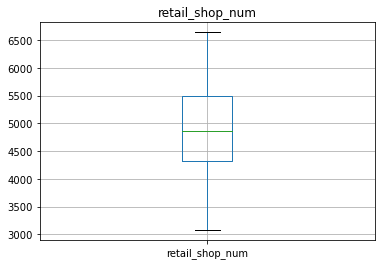

In [16]:
df_imputed[sel[1]]=df_imputed[sel[1]].where(df_imputed[sel[1]]>LB,other=LB)
df_imputed[sel[1]]=df_imputed[sel[1]].where(df_imputed[sel[1]]<UB,other=UB)
df_imputed[[sel[1]]].boxplot()
plt.title(sel[1])
plt.show()

In [17]:
IQR=df_imputed[sel[2]].quantile(0.75)-df_imputed[sel[2]].quantile(0.25)
LB=df_imputed[sel[2]].median()-IQR*1.5
UB=df_imputed[sel[2]].median()+IQR*1.5
print("Number of outlier at lower edge",df_imputed[df_imputed[sel[2]]<LB].shape[0])
print("Number of outlier at upper edge",df_imputed[df_imputed[sel[2]]>UB].shape[0])

Number of outlier at lower edge 0
Number of outlier at upper edge 285


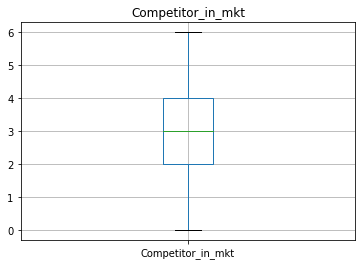

In [18]:
df_imputed[sel[2]]=df_imputed[sel[2]].where(df_imputed[sel[2]]>LB,other=LB)
df_imputed[sel[2]]=df_imputed[sel[2]].where(df_imputed[sel[2]]<UB,other=UB)
df_imputed[[sel[2]]].boxplot()
plt.title(sel[2])
plt.show()

In [19]:
IQR=df_imputed[sel[4]].quantile(0.75)-df_imputed[sel[4]].quantile(0.25)
LB=df_imputed[sel[4]].median()-IQR*1.5
UB=df_imputed[sel[4]].median()+IQR*1.5
print("Number of outlier at lower edge",df_imputed[df_imputed[sel[4]]<LB].shape[0])
print("Number of outlier at upper edge",df_imputed[df_imputed[sel[4]]>UB].shape[0])

Number of outlier at lower edge 153
Number of outlier at upper edge 1582


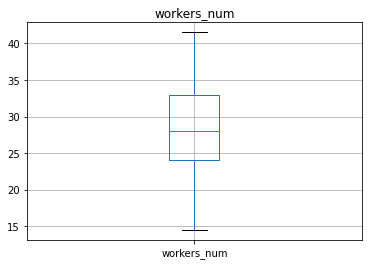

In [20]:
df_imputed[sel[4]]=df_imputed[sel[4]].where(df_imputed[sel[4]]>LB,other=LB)
df_imputed[sel[4]]=df_imputed[sel[4]].where(df_imputed[sel[4]]<UB,other=UB)
df_imputed[[sel[4]]].boxplot()
plt.title(sel[4])
plt.show()

In [21]:
IQR=df_imputed[sel[8]].quantile(0.75)-df_imputed[sel[8]].quantile(0.25)
LB=df_imputed[sel[8]].median()-IQR*1.5
UB=df_imputed[sel[8]].median()+IQR*1.5
print("Number of outlier at lower edge",df_imputed[df_imputed[sel[8]]<LB].shape[0])
print("Number of outlier at upper edge",df_imputed[df_imputed[sel[8]]>UB].shape[0])

Number of outlier at lower edge 0
Number of outlier at upper edge 5141


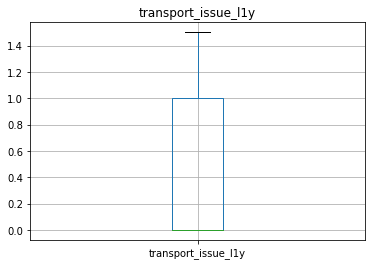

In [22]:
df_imputed[sel[8]]=df_imputed[sel[8]].where(df_imputed[sel[8]]>LB,other=LB)
df_imputed[sel[8]]=df_imputed[sel[8]].where(df_imputed[sel[8]]<UB,other=UB)
df_imputed[[sel[8]]].boxplot()
plt.title(sel[8])
plt.show()

In [548]:
df_imputed.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3.0,1.0,2.0,4651.0,24.0,0.0,1.0,1.0,91.0,29.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,4.0,6217.0,47.0,0.0,0.0,1.0,210.0,31.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,4.0,4306.0,64.0,0.0,0.0,0.0,161.0,37.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,1.5,2.0,6000.0,50.0,0.0,0.0,0.0,103.0,21.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.0,1.0,2.0,4740.0,42.0,1.0,0.0,1.0,112.0,25.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
df_imputed['wh_est_year']

0        2013.02
1        2020.80
2        2009.92
3        2010.88
4        2009.00
          ...   
24995    2005.00
24996    2012.00
24997    2007.46
24998    2008.24
24999    2019.00
Name: wh_est_year, Length: 25000, dtype: float64

In [23]:
df_imputed['wh_est_year'] = df_imputed['wh_est_year'].apply(lambda x: math.trunc(x))

In [24]:
#creating new variable
df_imputed['wh_age'] = df_imputed['wh_est_year'].apply(lambda x: 2022 - x)
df_imputed['wh_age'].max()

26

In [25]:
bins= [0,5,10,15,20,25] #Since max value is 26 , bins are like that
labels = ['0-5','5-10','10-15','15-20','20-25']
df_imputed['AgeGroup'] = pd.cut(df_imputed['wh_age'], bins=bins, labels=labels, right=False)

In [437]:
df_imputed['AgeGroup'].value_counts()

10-15    5763
0-5      5153
5-10     4747
15-20    4410
20-25    4265
Name: AgeGroup, dtype: int64

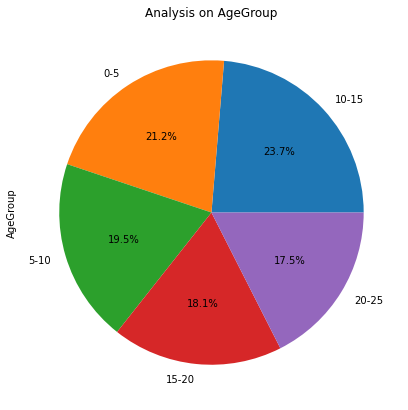

In [26]:
df_imputed['AgeGroup'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title('Analysis on AgeGroup')
plt.show()

In [30]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   num_refill_req_l3m               25000 non-null  float64 
 1   transport_issue_l1y              25000 non-null  float64 
 2   Competitor_in_mkt                25000 non-null  float64 
 3   retail_shop_num                  25000 non-null  float64 
 4   distributor_num                  25000 non-null  float64 
 5   flood_impacted                   25000 non-null  float64 
 6   flood_proof                      25000 non-null  float64 
 7   electric_supply                  25000 non-null  float64 
 8   dist_from_hub                    25000 non-null  float64 
 9   workers_num                      25000 non-null  float64 
 10  wh_est_year                      25000 non-null  int64   
 11  storage_issue_reported_l3m       25000 non-null  float64 
 12  temp

In [27]:
dftry=df_imputed.copy()

In [348]:
df_imputed.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type_Urban',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C', 'wh_age', 'AgeGroup'],
      dtype='object')

In [28]:
dftry= pd.get_dummies(dftry,columns=['AgeGroup'],drop_first=True)

In [29]:
dftry = dftry.drop(['wh_age','wh_est_year'],axis=1) # these variables are not required as we have already created new column age grp

In [30]:
dftry.columns = dftry.columns.str.replace(' ', '_').str.replace('+','plus').str.replace('-', 'to')

In [31]:
dftry.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone_6,wh_owner_type_Rented,approved_wh_govt_certificate_Aplus,approved_wh_govt_certificate_B,approved_wh_govt_certificate_Bplus,approved_wh_govt_certificate_C,AgeGroup_5to10,AgeGroup_10to15,AgeGroup_15to20,AgeGroup_20to25
0,3.0,1.0,2.0,4651.0,24.0,0.0,1.0,1.0,91.0,29.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0.0,0.0,4.0,6217.0,47.0,0.0,0.0,1.0,210.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1.0,0.0,4.0,4306.0,64.0,0.0,0.0,0.0,161.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,7.0,1.5,2.0,6000.0,50.0,0.0,0.0,0.0,103.0,21.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0
4,3.0,1.0,2.0,4740.0,42.0,1.0,0.0,1.0,112.0,25.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0


In [32]:
df_x = dftry.drop('product_wg_ton',axis=1)
df_y = dftry['product_wg_ton']

In [94]:
#df_x = df_x.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [353]:
df_x.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone_6,wh_owner_type_Rented,approved_wh_govt_certificate_Aplus,approved_wh_govt_certificate_B,approved_wh_govt_certificate_Bplus,approved_wh_govt_certificate_C,AgeGroup_5to10,AgeGroup_10to15,AgeGroup_15to20,AgeGroup_20to25
0,3.0,1.0,2.0,4651.0,24.0,0.0,1.0,1.0,91.0,29.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0.0,0.0,4.0,6217.0,47.0,0.0,0.0,1.0,210.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1.0,0.0,4.0,4306.0,64.0,0.0,0.0,0.0,161.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,7.0,1.5,2.0,6000.0,50.0,0.0,0.0,0.0,103.0,21.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0
4,3.0,1.0,2.0,4740.0,42.0,1.0,0.0,1.0,112.0,25.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0


### Calculating the VIF 

In [33]:
df_x = dftry.drop(['product_wg_ton'],axis=1)
df_y = dftry['product_wg_ton']

In [168]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
vif["Features"] = df_x.columns
round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2)

,VIF_Factor,Features
0,inf,WH_capacity_size_Mid
1,inf,WH_regional_zone_Zone_2
2,inf,WH_regional_zone_Zone_3
3,inf,WH_regional_zone_Zone_4
4,27.83,retail_shop_num
5,20.77,workers_num
6,17.08,zone_North
7,16.47,storage_issue_reported_l3m
8,13.19,zone_West
9,11.22,zone_South


In [169]:
import dataframe_image as dfi
dfi.export(round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2), "VIF_all.png")

now we we will remove the variables at the top "WH_capacity_size_Mid"and run VIF again to see the multicolineratity

In [170]:
df_x1 = df_x.drop(['WH_capacity_size_Mid'],axis=1)
df_y = dftry['product_wg_ton']

In [171]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x1.values, i) for i in range(df_x1.shape[1])]
vif["Features"] = df_x1.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,27.833342,retail_shop_num
1,20.771867,workers_num
2,17.084993,zone_North
3,16.472371,storage_issue_reported_l3m
4,13.189246,zone_West
5,11.222019,zone_South
6,9.777918,Competitor_in_mkt
7,7.717453,distributor_num
8,7.555934,dist_from_hub
9,7.107850,govt_check_l3m


Now we will remove variable "retail_shop_num" and run VIF again

In [172]:
df_x2 = df_x1.drop(['retail_shop_num'],axis=1)

In [173]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x2.values, i) for i in range(df_x2.shape[1])]
vif["Features"] = df_x2.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,20.366013,workers_num
1,16.443208,storage_issue_reported_l3m
2,15.140285,zone_North
3,11.838660,zone_West
4,10.179687,zone_South
5,9.777087,Competitor_in_mkt
6,7.664984,distributor_num
7,7.503747,dist_from_hub
8,6.802072,govt_check_l3m
9,6.505690,wh_breakdown_l3m


Now we will try to remove the variable "workers_num,storage_issue_reported_l3m,zone_North" as its still showing VIF value greater than 10

In [174]:
df_x3 = df_x2.drop(['workers_num','storage_issue_reported_l3m','zone_North'],axis=1)

In [175]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x3.values, i) for i in range(df_x3.shape[1])]
vif["Features"] = df_x3.columns
round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2)

,VIF_Factor,Features
0,9.58,Competitor_in_mkt
1,7.27,distributor_num
2,7.15,dist_from_hub
3,6.23,wh_breakdown_l3m
4,5.99,govt_check_l3m
5,4.82,WH_regional_zone_Zone_6
6,3.97,WH_regional_zone_Zone_5
7,3.84,WH_regional_zone_Zone_4
8,3.69,num_refill_req_l3m
9,3.07,electric_supply


In [177]:
import dataframe_image as dfi
dfi.export(round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2), "vif_sel1.png")

We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold other than 10. (it depends on the business requirements)
now all the variables above have VIF values less than 10,will continue with these variables and so the model buliding

dropping the columns with VIF > 10

In [82]:
X= dftry.drop(['product_wg_ton','WH_capacity_size_Mid','retail_shop_num','workers_num','storage_issue_reported_l3m','zone_North'], axis=1)
Y= dftry['product_wg_ton']

In [42]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,temp_reg_mach,wh_breakdown_l3m,...,WH_regional_zone_Zone_6,wh_owner_type_Rented,approved_wh_govt_certificate_Aplus,approved_wh_govt_certificate_B,approved_wh_govt_certificate_Bplus,approved_wh_govt_certificate_C,AgeGroup_5to10,AgeGroup_10to15,AgeGroup_15to20,AgeGroup_20to25
0,3.0,1.0,2.0,24.0,0.0,1.0,1.0,91.0,0.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0.0,0.0,4.0,47.0,0.0,0.0,1.0,210.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1.0,0.0,4.0,64.0,0.0,0.0,0.0,161.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,7.0,1.5,2.0,50.0,0.0,0.0,0.0,103.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0
4,3.0,1.0,2.0,42.0,1.0,0.0,1.0,112.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0


In [83]:
X.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Urban', 'WH_capacity_size_Small', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone_2', 'WH_regional_zone_Zone_3',
       'WH_regional_zone_Zone_4', 'WH_regional_zone_Zone_5',
       'WH_regional_zone_Zone_6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_Aplus', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_Bplus', 'approved_wh_govt_certificate_C',
       'AgeGroup_5to10', 'AgeGroup_10to15', 'AgeGroup_15to20',
       'AgeGroup_20to25'],
      dtype='object')

### Train -Test Split

In [84]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [85]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))


The dimension of X_train is (17500, 29)
The dimension of X_test is (7500, 29)


### Scaling 

In [86]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [87]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=1)
dtr = tree.DecisionTreeRegressor(random_state=1)
lr = LinearRegression()
ls = Lasso(alpha=0.01)
rr = Ridge(alpha=0.01)

models=[rr,ls,lr,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr,rr,ls) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Ridge Regression','Lasso Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Ridge Regression         6309.611481  6116.417641        0.706412    0.718091
Lasso Regression         6309.611483  6116.414842        0.706412    0.718092
Linear Regression        6309.611480  6116.416342        0.706412    0.718091
Decision Tree Regressor     0.000000  8279.361701        1.000000    0.483455
Random Forest Regressor  2260.833938  5941.906187        0.962306    0.733948
ANN Regressor            6270.815141  6080.124435        0.710012    0.721427


#### Linear Regression Coefficients

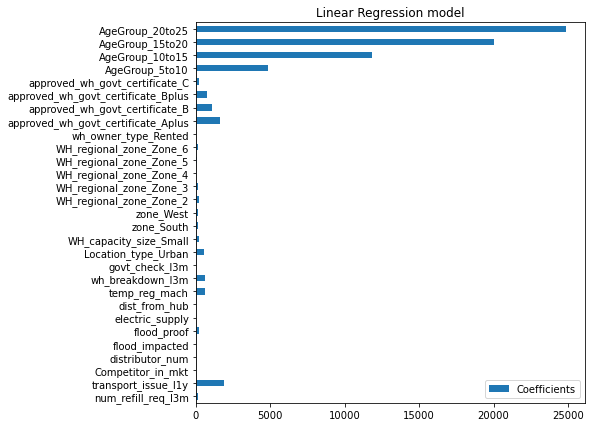

In [92]:
import matplotlib.pyplot as plt

features = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features.Coefficients = features.Coefficients.abs()
features.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


In [131]:
#### Ridge Regression Coefficients

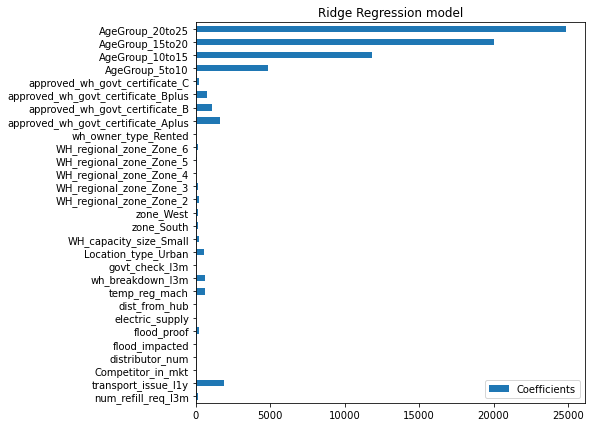

In [93]:
features_ridge = pd.DataFrame(
   rr.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features_ridge.Coefficients = features_ridge.Coefficients.abs()
features_ridge.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [132]:
#### Lasso Regression Coefficients

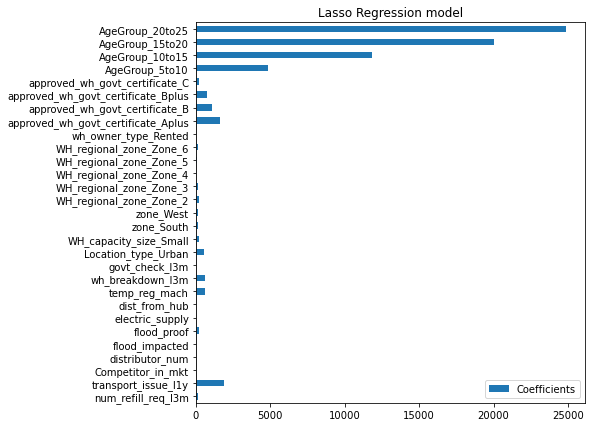

In [94]:
features_lasso = pd.DataFrame(
   ls.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features_lasso.Coefficients = features_lasso.Coefficients.abs()
features_lasso.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Random Forest Regression feature Importances

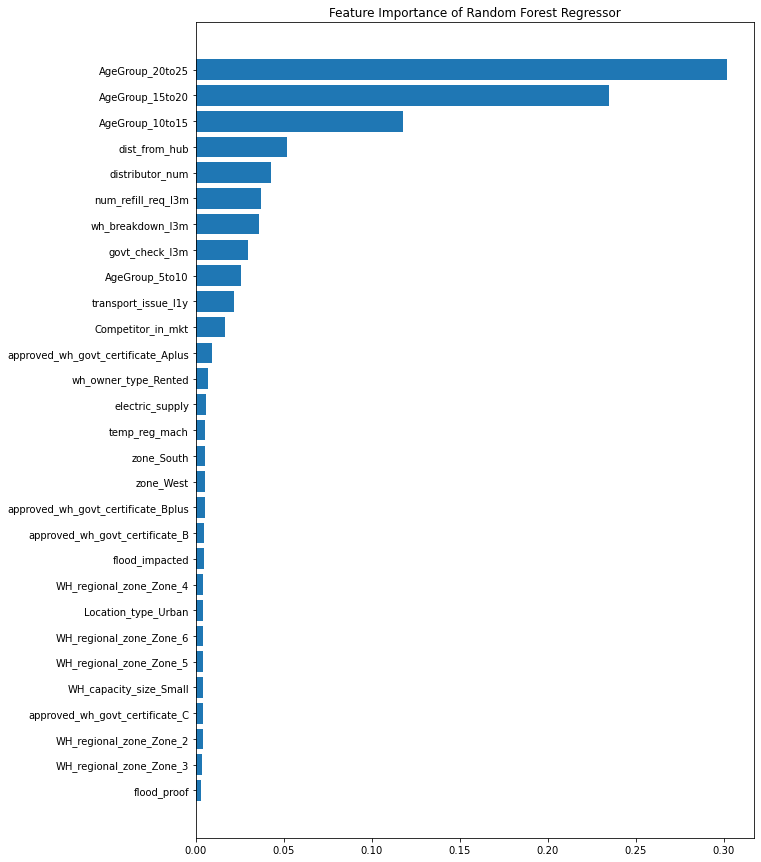

In [101]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_i = list(zip(features,rfr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature Importance of Random Forest Regressor")

plt.show()

#### Decision Tree Regression feature Importances

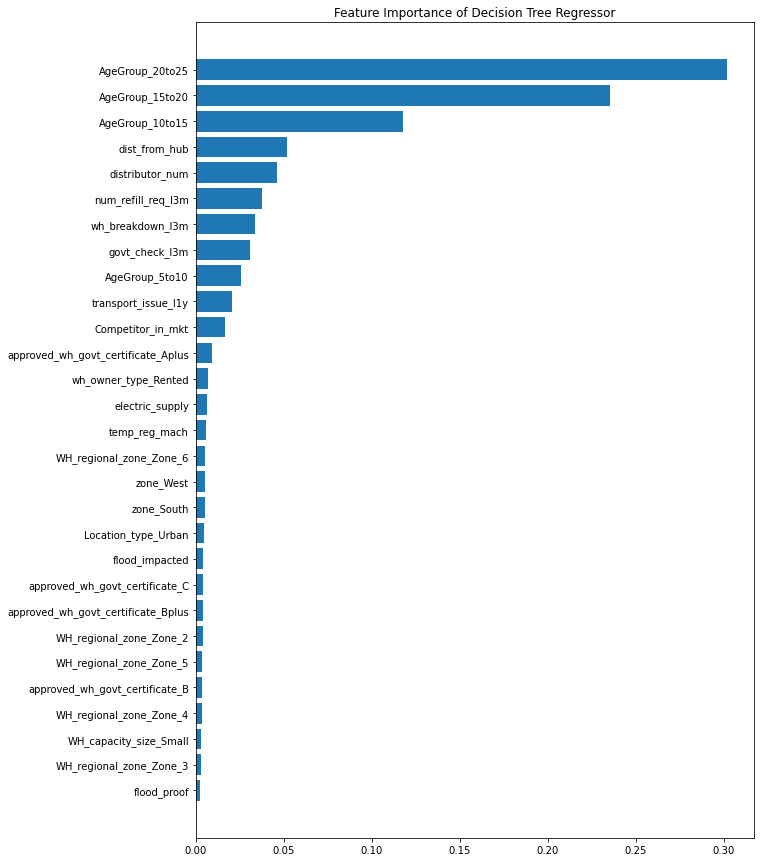

In [103]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_d = list(zip(features,dtr.feature_importances_))
f_d.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_d],[x[1] for x in f_d])
plt.title("Feature Importance of Decision Tree Regressor")

plt.show()

In [187]:
features_mlp = pd.DataFrame(
   annr.coefs_
)


In [188]:
features_mlp

,0
0,"[[0.05864258718967174, 0.2231505186057033, 0.0..."
1,"[[3.99757376279411], [3.800583190605268], [3.9..."


Regularization is used as optimization method. In regularization, same number of features are kept and magnitude of coefficients is reduced. Lasso is modification of linear regression where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In our results, we see the results are almost similar for linear, lasso and ridge regression. Since the features are selected using VIF method, lasso and ridge are performing same as linear regression.

Decision tree and Random Forest's nonlinear nature gives better results than linear regression. Decision tree's accuracy shows that it is overfitting, so does random forest's results shows.

Leanear regression and other methods can understand only linear relationships, to understand non-linear relationships ANN works better. Looking at the result ANN performs better than Linear and regularization methods. Real life data is supposed to have complex non-linear relationships, that's why ANN is giving better results than linear models.

But these results can be overfitting or underfitting. We can use grid search to tackle this problem.

### Linear Regression : Model 1

In [373]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

LinearRegression()

In [374]:
# R square 
print('R square on Train data:',regression_model1.score(X_train, y_train))
print('R square on Test data:',regression_model1.score(X_test, y_test))

R square on Train data: 0.7064122107879702
R square on Test data: 0.7180913835691738


In [375]:
#RMSE on Training data
predict_train= regression_model1.predict(X_train)
np.sqrt(np.mean(np.square(predict_train - y_train)))

6309.611480181346

In [376]:
#RMSE on Testing data
predict_test= regression_model1.predict(X_test)
np.sqrt(np.mean(np.square(predict_test - y_test)))

6116.41634175187

In [377]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test, y_test], axis=1)
data_train1.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,temp_reg_mach,wh_breakdown_l3m,...,wh_owner_type_Rented,approved_wh_govt_certificate_Aplus,approved_wh_govt_certificate_B,approved_wh_govt_certificate_Bplus,approved_wh_govt_certificate_C,AgeGroup_5to10,AgeGroup_10to15,AgeGroup_15to20,AgeGroup_20to25,product_wg_ton
4289,0.0,1.5,4.0,43.0,0.0,0.0,1.0,127.0,0.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0,1,0,0,23086.0
19621,6.0,1.5,3.0,59.0,0.0,0.0,1.0,248.0,1.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0,1,0,0,19108.0
14965,6.0,0.0,4.0,39.0,0.0,0.0,1.0,63.0,0.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0,0,0,1,38125.0
12321,6.0,1.0,3.0,54.0,0.0,0.0,1.0,260.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,33123.0
6269,4.0,1.5,3.0,23.0,0.0,0.0,1.0,144.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,26089.0


In [378]:
expr1= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + Competitor_in_mkt + distributor_num + flood_impacted + flood_proof + electric_supply + dist_from_hub + temp_reg_mach + wh_breakdown_l3m + govt_check_l3m + Location_type_Urban +  WH_capacity_size_Small  + zone_South + zone_West + WH_regional_zone_Zone_2 + WH_regional_zone_Zone_3 + WH_regional_zone_Zone_4 + WH_regional_zone_Zone_5 + WH_regional_zone_Zone_6 + wh_owner_type_Rented + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus +approved_wh_govt_certificate_C+AgeGroup_5to10 +AgeGroup_10to15 +AgeGroup_15to20 + AgeGroup_20to25' 

In [379]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr1, data = data_train1).fit()
lm1.params

Intercept                              8946.124569
num_refill_req_l3m                      145.970517
transport_issue_l1y                   -1887.694603
Competitor_in_mkt                        -0.852800
distributor_num                          -0.485015
flood_impacted                           17.642373
flood_proof                             204.932656
electric_supply                         -19.293232
dist_from_hub                             0.284104
temp_reg_mach                           617.492717
wh_breakdown_l3m                        575.507684
govt_check_l3m                            0.746605
Location_type_Urban                     560.394847
WH_capacity_size_Small                 -193.354019
zone_South                              156.863977
zone_West                               122.062642
WH_regional_zone_Zone_2                 227.036596
WH_regional_zone_Zone_3                -169.436997
WH_regional_zone_Zone_4                  29.803544
WH_regional_zone_Zone_5        

In [380]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1449.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:03:08   Log-Likelihood:            -1.7795e+05
No. Observations:               17500   AIC:                         3.560e+05
Df Residuals:                   17470   BIC:                         3.562e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [431]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train1.drop('product_wg_ton',axis=1))-data_train1['product_wg_ton'])**2)
#Root Mean Squared Error - RMSE
np.sqrt(mse)

6319.214585197354

In [381]:
exp2= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + temp_reg_mach + wh_breakdown_l3m + Location_type_Urban + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus +AgeGroup_5to10 + AgeGroup_10to15 + AgeGroup_15to20 + AgeGroup_20to25'

In [382]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= exp2, data = data_train1).fit()
lm2.params

Intercept                              8884.037892
num_refill_req_l3m                      146.833486
transport_issue_l1y                   -1890.789570
temp_reg_mach                           611.424257
wh_breakdown_l3m                        573.704021
Location_type_Urban                     548.660258
approved_wh_govt_certificate_Aplus     1724.136942
approved_wh_govt_certificate_B        -1006.173193
approved_wh_govt_certificate_Bplus     -676.493913
AgeGroup_5to10                         4851.607693
AgeGroup_10to15                       11850.042189
AgeGroup_15to20                       20029.921530
AgeGroup_20to25                       24879.380111
dtype: float64

In [383]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     3501.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:03:59   Log-Likelihood:            -1.7796e+05
No. Observations:               17500   AIC:                         3.560e+05
Df Residuals:                   17487   BIC:                         3.561e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [461]:
# Calculate MSE
mse = np.mean((lm2.predict(data_train1.drop('product_wg_ton',axis=1))-data_train1['product_wg_ton'])**2)
#Root Mean Squared Error - RMSE
np.sqrt(mse)

6312.700993193786

The R2 has no much change even after removing the variables which is p value less than 0.05

### Ensemble modelling

In [124]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [116]:
!pip install xgboost

In [125]:
model_ABR = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
bagging= BaggingRegressor()
xgboost =xgb.XGBRegressor()

models=[model_ABR,gbr,bagging,xgboost]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['AdaBoostRegressor','GradientBoostingRegressor','BaggingRegressor','XGBRegressor']))

                            Train RMSE    Test RMSE  Training Score  \
AdaBoostRegressor          6966.726150  6831.878963        0.642076   
GradientBoostingRegressor  5974.914157  5830.547551        0.736733   
BaggingRegressor           2646.834314  6202.275432        0.948336   
XGBRegressor               4364.924285  6001.273362        0.859497   

                           Test Score  
AdaBoostRegressor            0.648282  
GradientBoostingRegressor    0.743827  
BaggingRegressor             0.710121  
XGBRegressor                 0.728605  


#### ADABoost feature Importance

<AxesSubplot:>

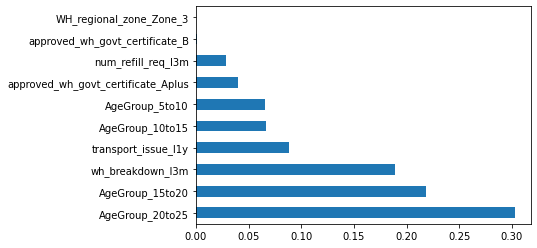

In [130]:
feature_importances_ada = pd.Series(model_ABR.feature_importances_ , index=X_train.columns)
feature_importances_ada.nlargest(10).plot(kind='barh')

#### GradientBoosting feature Importance

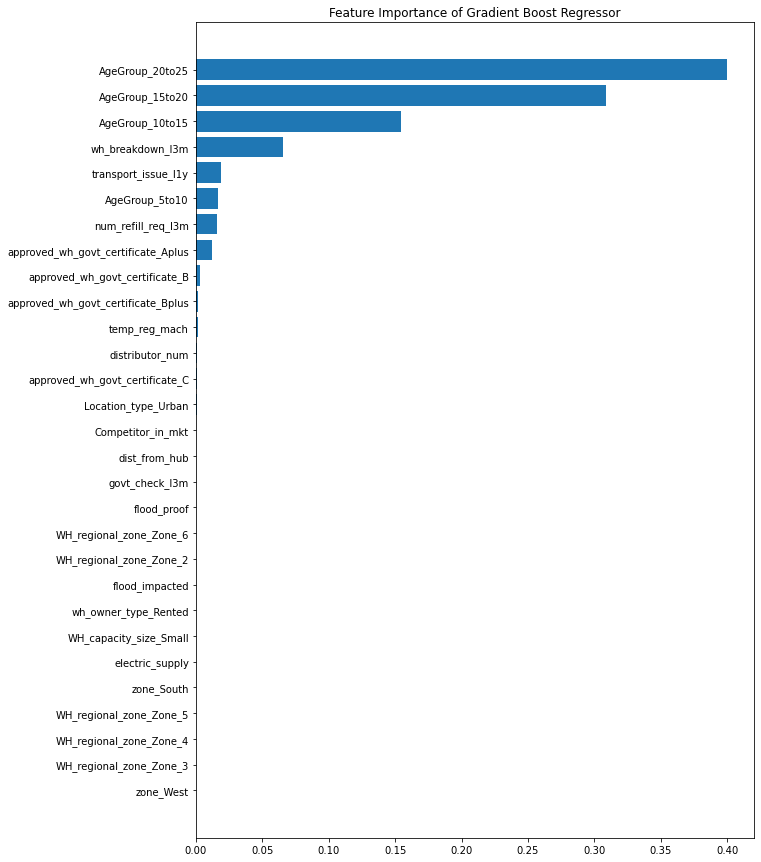

In [142]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_g = list(zip(features,gbr.feature_importances_))
f_g.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_g],[x[1] for x in f_g])
plt.title("Feature Importance of Gradient Boost Regressor")

plt.show()

#### Bagging feature Importance

In [147]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)

feature_bg=pd.DataFrame(feature_importances,
   columns=['feature_importances'], index=X_train.columns)

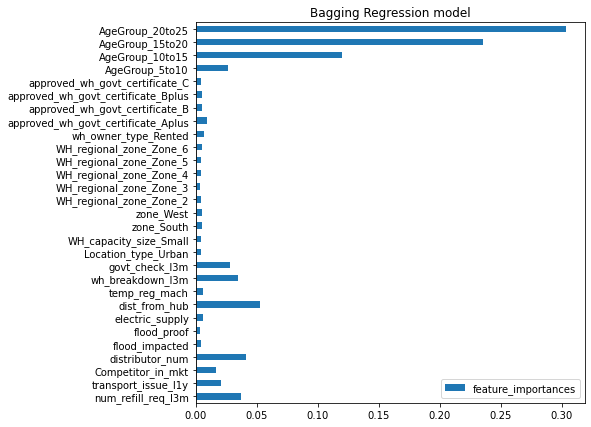

In [149]:
feature_bg.plot(kind='barh', figsize=(9, 7))
plt.title('Bagging Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### XGB Feature Importance

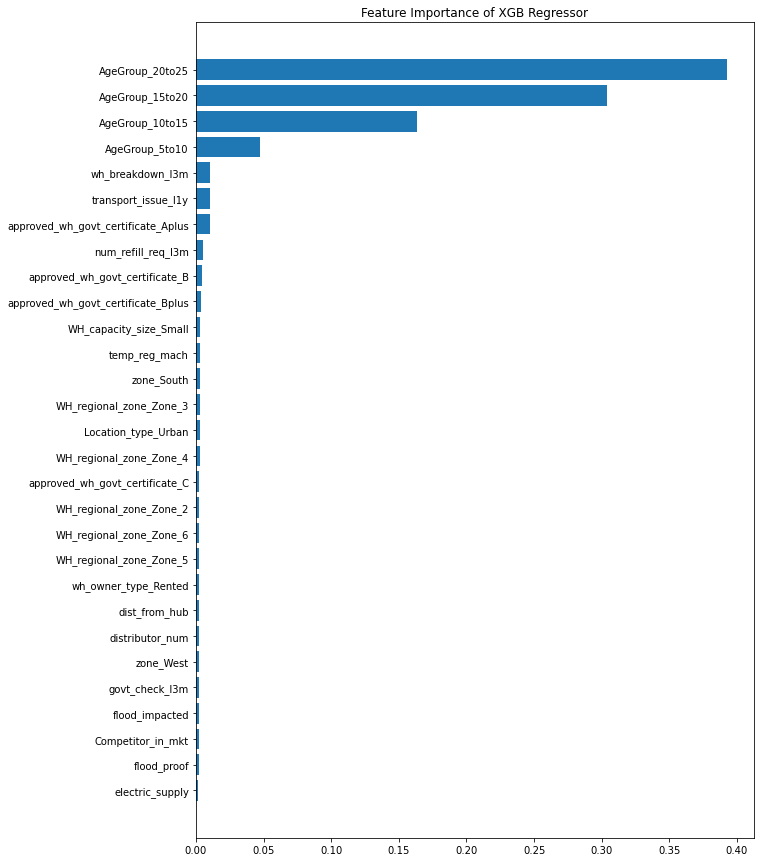

In [156]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_x = list(zip(features,xgboost.feature_importances_))
f_x.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_x],[x[1] for x in f_x])
plt.title("Feature Importance of XGB Regressor")

plt.show()

### Model Tuning

#### GridSerachCV on Ridge Regression 

In [502]:
params = {'alpha': (np.linspace(0.1, 1, 25)),
              'solver' :['svd','cholesky','sag','saga','lsqr','lbfgs','sparse_cg'],
              'tol':[0.001,0.1]}
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params,cv = 10)
ridge_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ]),
                         'solver': ['svd', 'cholesky', 'sag', 'saga', 'lsqr',
                                    'lbfgs', 'sparse_cg'],
                         'tol': [0.001, 0.1]})

In [505]:
print(ridge_model.best_params_)

{'alpha': 0.1, 'solver': 'saga', 'tol': 0.1}


#### GridSerachCV on Lasso Regression

In [500]:
params = {'alpha': (np.linspace(0.05, 1 , 25)),
              'tol':[0.0001,0.001,0.1] }
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(x_train_scaled, y_train)


GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.05      , 0.08958333, 0.12916667, 0.16875   , 0.20833333,
       0.24791667, 0.2875    , 0.32708333, 0.36666667, 0.40625   ,
       0.44583333, 0.48541667, 0.525     , 0.56458333, 0.60416667,
       0.64375   , 0.68333333, 0.72291667, 0.7625    , 0.80208333,
       0.84166667, 0.88125   , 0.92083333, 0.96041667, 1.        ]),
                         'tol': [0.0001, 0.001, 0.1]})

In [501]:
print(lasso_model.best_params_)

{'alpha': 0.16875, 'tol': 0.0001}


#### Grid Search on Decision Tree

In [487]:
param_grid = {
    'max_depth': [20,25,30,35,40,50],  #10,15,20,25,30
    'min_samples_leaf': [3, 15,18,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [20, 25, 30, 35, 40, 50],
                         'min_samples_leaf': [3, 15, 18, 30],
                         'min_samples_split': [15, 30, 35, 40, 50]})

In [488]:
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 15}


#### Grid Search for Random Forest

In [472]:
param_grid = {
    'max_depth': [10,15,20],
    'max_features': [4,6,8],
    'min_samples_leaf': [5,15,30],
    'min_samples_split': [20,30,50],
    'n_estimators': [300,400]
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)

In [473]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [5, 15, 30],
                         'min_samples_split': [20, 30, 50],
                         'n_estimators': [300, 400]})

In [474]:
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


#### Grid Search for MLPregressor

In [393]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=500, random_state=1)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [394]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=500, random_state=1),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [396]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [506]:
ridge = Ridge(alpha = 0.1, solver = 'saga' , tol=0.1, normalize = True)
lasso = Lasso(alpha = 0.16875, tol = 0.0001, normalize = True)
regression_model = LinearRegression()
dtr = tree.DecisionTreeRegressor(max_depth=20,min_samples_split=15,min_samples_leaf=30,random_state=1)
rfr = RandomForestRegressor(max_depth=20, max_features=8, 
                            min_samples_leaf= 5,
                            min_samples_split= 20, n_estimators= 300,
                            random_state=1)
annr = MLPRegressor(activation='relu', hidden_layer_sizes=500, 
                    solver='adam',random_state=1, 
                    max_iter=10000)


models=[ridge,lasso,regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    
     if (i != annr,rr,ls) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
     else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Ridge Regression','Lasso Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Ridge Regression         6522.990335  6366.758940        0.686219    0.694542
Lasso Regression         6310.903801  6115.721609        0.706292    0.718155
Linear Regression        6309.611480  6116.416342        0.706412    0.718091
Decision Tree Regressor  5529.032981  5944.868718        0.774560    0.733683
Random Forest Regressor  4998.510475  5753.391008        0.815747    0.750562
ANN Regressor            6270.815141  6080.124435        0.710012    0.721427


#### GridSearchCV on AdaBoosting

In [504]:
params = {
     'n_estimators': np.arange(10,100,10),
    'loss' : ['linear', 'square', 'exponential'],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostRegressor(), param_grid= params, cv=3, n_jobs=-1)
grid_cv.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [400]:
grid_cv.best_params_ 

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 30}

#### GridSearchCV on GradientBoosting

In [409]:
params_GBR_GS = {"max_depth": [3,5,6,7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,20,30]} 

model_GradR2_GS = GridSearchCV(GradientBoostingRegressor(), param_grid=params_GBR_GS)
model_GradR2_GS.fit(x_train_scaled,y_train)
model_GradR2_GS.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 30}

#### GridSearchCV on Bagging

In [508]:
baggingR = BaggingRegressor()

params_bag_GS = {"n_estimators": [200,300], #50,100
              "max_features":[20,30,50], #12468
              "max_samples": [0.5,0.1,1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

Bag_model_GS = GridSearchCV(baggingR, param_grid=params_bag_GS)
Bag_model_GS.fit(x_train_scaled,y_train)
Bag_model_GS.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 20,
 'max_samples': 0.1,
 'n_estimators': 200}

#### GridSearchCV on XGBRegressor

In [512]:
params_xgbR_GS = {"max_depth": [3,4,5,6,7],
              "min_child_weight" : [4,5,6,8],
            'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],
            'n_estimators': [30,50,100]}

model_xgbR_GS = GridSearchCV(XGBRegressor(), param_grid=params_xgbR_GS)
model_xgbR_GS.fit(x_train_scaled,y_train)
model_xgbR_GS.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 8,
 'n_estimators': 100}

In [525]:
model_ABR = AdaBoostRegressor(learning_rate = 0.1,loss ='linear', n_estimators =30) #0.05,60
gbr = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 7,min_samples_leaf =10,min_samples_split =2,n_estimators=30)
bagging= BaggingRegressor(bootstrap = True,bootstrap_features=False,max_features=20,max_samples=0.1,n_estimators=200)
xgboost =XGBRegressor(learning_rate= 0.05,max_depth =7,min_child_weight= 8,n_estimators=100)

models=[model_ABR,gbr,bagging,xgboost]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['AdaBoostRegressor','GradientBoostingRegressor','BaggingRegressor','XGBRegressor']))

                            Train RMSE    Test RMSE  Training Score  \
AdaBoostRegressor          6702.770929  6521.561200        0.668685   
GradientBoostingRegressor  5536.089545  5733.531933        0.773984   
BaggingRegressor           6289.326204  6810.356727        0.708297   
XGBRegressor               5364.443833  5724.930354        0.787782   

                           Test Score  
AdaBoostRegressor            0.679508  
GradientBoostingRegressor    0.752281  
BaggingRegressor             0.650495  
XGBRegressor                 0.753024  


#### Best Model
According to results, Random forest regressor is best model. Important features are calculated using random forest regressor.

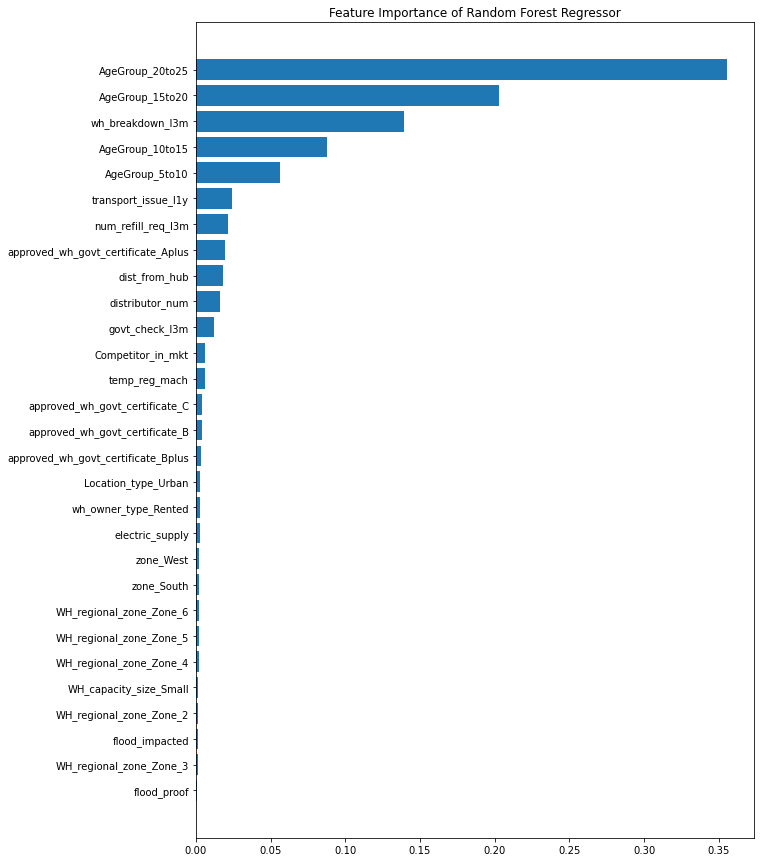

In [526]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_i = list(zip(features,rfr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature Importance of Random Forest Regressor")

plt.show()

Comparing models like Linear regression, Laso regression, Ridge regression, ANN, CART and Enselble methods, I got the best results for Random Forest regressor. Random forest regressor is giving 81% accuracy. To handle overfitting, I performe hyperparameter tuning using gridsearch CV. Decision tree gives high variance and to overcome that random forest is better solution. Random Forest itself calculates the feature importance.

